## Ensemble

In [ ]:
Voting - 서로 다른 모델 여러 개, 학습 데이터는 동일
         여러 모델의 결과를 집계 (hard voting - 개수, soft voting - 확률값의 평균)
         모델별로 가중치(weight)를 사용해서 서로 다른 권리를 부여할 수 있다

Bagging - 같은 모델 여러 개, 학습 데이터가 다름
          데이터 셋에서 - 일부 데이터를 sampling해서 학습데이터로 사용함
          데이터를 sampling을 부트스트랩(bootstrap)방식으로 함
           - 단순 임의 복원 추출 방식(중복 허용, 선택되지 않을 수 있음)
          모델간 서로 영향을 주지 않는 sampling과 학습이 이루어짐
          결과를 집계해서 최종 결과를 산출
          
Boosting - 순차적 학습
           데이터 셋에서 데이터를 sampling할  때 이전 모델의 학습결과를 사용해서 sampling을 함
           학습결과가 좋지 않은 sample에 대해 다시 학습 대상으로 사용될 확률을 높임

Stacking - 여러 개의 서로 다른 모델이 데이터셋에 대해 학습을 하여 결과를 만들어냄
           학습 결과를 가지고 다시 학습하는 모델 - 최종결과를 만들어냄 

## 1.함수 생성

In [ ]:
# [1] get_classification_scores 함수 만들기
# accuracy, precision, recall, f1
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

def get_classification_scores(model, x_test, y_test):
    y_pred = model.predict(x_test)
    A = accuracy_score(y_test, y_pred)
    B = precision_score(y_test, y_pred)
    C = recall_score(y_test, y_pred)
    D = f1_score(y_test, y_pred)
    return [round(x, 4) for x in [A, B, C, D]]

In [ ]:
# [2] get_regression_scores 함수 만들기
# r2_score, mae, mse, msle
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_log_error as msle

def get_regression_scores(model, x_test, y_test):
    y_pred = model.predict(x_test)
    A = r2_score(y_test, y_pred)
    B = mae(y_test, y_pred)
    C = mse(y_test, y_pred)
    D = msle(y_test, y_pred)
    return [round(x, 4) for x in [A, B, C, D]]

In [ ]:
# [3] make_data 함수 만들기
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

def make_data(data, kind='classification'):

    # 데이터를 X, y로 분리한다
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]

    # 스케일링 처리
    X_scaled = StandardScaler().fit_transform(X)

    # train test 분리 (7.5:2.5), 층화추출, random_state=0
    stratify = y if kind=='classification' else None
    result = train_test_split(X_scaled,
                              y,
                              stratify=stratify,
                              random_state=0) 
    return result


In [ ]:
# [4] make_classification_model 함수 만들기
def make_classification_model(name, model, data):
    # data 분리
    x_train, x_test, y_train, y_test = data

    # 모델 학습  
    model.fit(x_train, y_train)

    # train_scores, test_score 구하기
    train_scores = get_classification_scores(model, x_train, y_train)
    test_scores = get_classification_scores(model, x_test, y_test)

    # DataFrame으로 만들어 x_test, y_test 와 함께 반환하기
    index = ['name', 'model',
             'accuracy1', 'precision1', 'recall1', 'f1_1',
             'accuracy2', 'precision2', 'recall2', 'f1_2']
    data = [name, model] + train_scores + test_scores
    return pd.Series(data, index=index).to_frame().T

In [ ]:
# [5] make_regression_model 함수 만들기
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

def make_regression_model(name, model, data):
    # 데이터 나누기
    x_train, x_test, y_train, y_test = data

    # 모델 학습  
    model.fit(x_train, y_train)

    # train_scores, test_score 구하기
    train_scores = get_regression_scores(model, x_train, y_train)
    test_scores = get_regression_scores(model, x_test, y_test)

    # DataFrame으로 만들어 x_test, y_test 와 함께 반환하기
    index = ['name', 'model',
             'r2_score1', 'mae1', 'mse1', 'msle1',
             'r2_score2', 'mae2', 'mse2', 'msle2']
    data = [name, model] + train_scores + test_scores
    return pd.Series(data, index=index).to_frame().T

## 2.위스콘신 유방암 진단(이진 분류)

### 2-1) 데이터 가져오기

In [ ]:
!git clone https://github.com/Soyoung-Yoon/data_05

Cloning into 'data_05'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 8 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), done.


In [ ]:
# [1] 암 데이터 가져오기
# 암 데이터를 가져와 cancer로 이름 지정
# make_data 를 사용한 data 분리 후 data_cancer 이름 지정
# target : ['malignant' 'benign']  : 악성(0), 양성(1)


### 2-2) voting 참여 분류기 생성
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

In [ ]:
# VotingClassifier의 사용법 확인
from sklearn.ensemble import VotingClassifier
VotingClassifier?

In [ ]:
# VotingRegressor의 사용법 확인
from sklearn.ensemble import VotingRegressor
VotingRegressor?

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
LogisticRegression?

In [ ]:
# [2] Voting을 위한 다양한 모델 생성

import pandas as pd

# Voting을 위한 다양한 모델 생성
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

# 1. n_neighbors 를 각각 3, 5로 갖는 KNN 모델 두 개 만들기
# 2. max_iter=10000 인 LogisticRegression 모델 만들기
# 3. max_depth 를 각각 3, 5로 갖는 DecisionTree 모델 두 개 만들기
knn3 = 
knn5 = 
lr =
dt3 = 
dt5 = 

# estimators = [('knn3', knn3), ('knn5', knn5), ...]  와 같이 
# estimator의 목록 생성
names = ['knn3', 'knn5', 'lr', 'dt3', 'dt5']
estimator = 
estimators = 
#print(estimators)

# Hard Voting 모델 생성
hard = 

# Soft Voting 모델 생성
soft = 

In [ ]:
# [3] 각 모델을 make_classification_model 을 사용하여 학습 
Tnames = ['hard', 'soft'] + names
Testimators = [hard, soft] + estimator

# 반복문을 사용한 ensemble 및 단독 모델 성능 비교
result = []
for a, b in zip(Tnames, Testimators):
    r = make_classification_model(a, b, data_cancer)
    #display(r)
    result.append(r)
    
df = pd.concat(result, ignore_index=True)
df

,name,model,accuracy1,precision1,recall1,f1_1,accuracy2,precision2,recall2,f1_2
0,hard,"VotingClassifier(estimators=[('knn3', KNeighbo...",0.993,0.9889,1.0,0.9944,0.958,0.9468,0.9889,0.9674
1,soft,"VotingClassifier(estimators=[('knn3', KNeighbo...",0.9977,0.9963,1.0,0.9981,0.9441,0.9457,0.9667,0.956
2,knn3,KNeighborsClassifier(n_neighbors=3),0.9883,0.9852,0.9963,0.9907,0.951,0.9368,0.9889,0.9622
3,knn5,KNeighborsClassifier(),0.9836,0.9851,0.9888,0.9869,0.951,0.9368,0.9889,0.9622
4,lr,LogisticRegression(max_iter=10000),0.9906,0.9888,0.9963,0.9925,0.958,0.9667,0.9667,0.9667
5,dt3,"DecisionTreeClassifier(max_depth=3, random_sta...",0.9765,0.9777,0.985,0.9813,0.9161,0.9432,0.9222,0.9326
6,dt5,"DecisionTreeClassifier(max_depth=5, random_sta...",1.0,1.0,1.0,1.0,0.9021,0.9419,0.9,0.9205


In [ ]:
# [4] accuracy1, accuracy2, diff 구하기
df['diff'] = 

temp = df[['name', 'accuracy1', 'accuracy2', 'diff']]
# temp를 diff를 기준으로 오름차순 정렬


,name,accuracy1,accuracy2,diff
3,knn5,0.9836,0.951,0.0247
4,lr,0.9906,0.958,0.0258
0,hard,0.993,0.958,0.027
2,knn3,0.9883,0.951,0.0285
1,soft,0.9977,0.9441,0.0421
5,dt3,0.9765,0.9161,0.0487
6,dt5,1.0,0.9021,0.0795


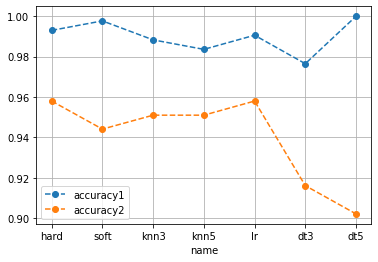

In [ ]:
# [5] accuracy 에 대한 선 그래프 그리기
import matplotlib.pyplot as plt

plt.grid()
plt.show()

### 2-3) 배깅(Bagging) 방식 - RandomForest
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# [6] cancer 데이터, RandomForestClassifier를 사용하여 학습하고 성능을 확인한다
# RandomForestClassifier의 경우 max_depth=4, random_state=0 사용
model = 
result = 
result

,name,model,accuracy1,precision1,recall1,f1_1,accuracy2,precision2,recall2,f1_2
0,RF,"(DecisionTreeClassifier(max_depth=4, max_featu...",0.9953,0.9926,1.0,0.9963,0.9441,0.9556,0.9556,0.9556


### 2-4) 부스팅(Boosting) 방식 : GradientBoosting

In [ ]:
# [7] cancer 데이터, GradientBoostingClassifier를 사용하여 학습하고 성능을 확인한다
from sklearn.ensemble import GradientBoostingClassifier

model = 
result = 
result

,name,model,accuracy1,precision1,recall1,f1_1,accuracy2,precision2,recall2,f1_2
0,GBC,([DecisionTreeRegressor(criterion='friedman_ms...,1.0,1.0,1.0,1.0,0.958,0.9773,0.9556,0.9663


### 2-5) Stacking 방식 : StackingClassifier

In [ ]:
from sklearn.ensemble import StackingClassifier
StackingClassifier?

In [ ]:
from sklearn.ensemble import StackingClassifier

# [8] RandomForestClassifier, GradientBoostingClassifier 를 estimators로 사용하고
# LogisticRegression을 final_estimator로 사용한다
# 이때, estimator 각각에 이름은 'rf', 'gb'로 사용한다
name = ['rf', 'gb']
estimator = 
estimators = 

model = 
result = 
result

,name,model,accuracy1,precision1,recall1,f1_1,accuracy2,precision2,recall2,f1_2
0,SC,"StackingClassifier(estimators=[('rf', RandomFo...",1.0,1.0,1.0,1.0,0.958,0.9667,0.9667,0.9667


### 2-6) XGBOOST(Extream Gradient Boost)

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### XGBOOST 분류
- https://xgboost.readthedocs.io/en/latest/index.html
- https://xgboost.readthedocs.io/en/latest/python/python_api.html

In [ ]:
from xgboost import XGBClassifier
XGBClassifier?

In [ ]:
from xgboost import XGBClassifier

# [9] XGBClassifier 를 사용하여 model을 만들고 학습시킨 뒤 성능을 확인한다
#   n_estimators=400, learning_rate=0.1, max_depth=3, 
#   use_label_encoder=False (Deprecated) eval_metric='logloss' 을 사용한다
model = 
result = 
result

,name,model,accuracy1,precision1,recall1,f1_1,accuracy2,precision2,recall2,f1_2
0,XGB,"XGBClassifier(eval_metric='logloss', learning_...",0.9977,0.9963,1.0,0.9981,0.965,0.967,0.9778,0.9724


- https://hwi-doc.tistory.com/entry/%EC%9D%B4%ED%95%B4%ED%95%98%EA%B3%A0-%EC%82%AC%EC%9A%A9%ED%95%98%EC%9E%90-XGBoost

#### XGBOOST 회귀 

In [ ]:
from xgboost import XGBRegressor
import pandas as pd

# [10] 보스톤 데이터 준비, 데이터 분리하여 data_boston 생성
boston = pd.read_csv('data_05/boston.csv')
data_boston = make_data(boston, kind='regression')

# [11] XGBRegressor 를 사용하여 model을 만들고 학습시킨 뒤 성능을 확인한다
#   다음 값을 사용한다
#   n_estimators=1000, learning_rate=0.2, max_depth=3,
#   objective ='reg:squarederror'
model = 
result = 
result

,name,model,r2_score1,mae1,mse1,msle1,r2_score2,mae2,mse2,msle2
0,XGB,"XGBRegressor(learning_rate=0.2, objective='reg...",0.992,0.6363,0.6852,0.002,0.7788,2.5822,18.0728,0.0279


### 2-7) lightGBM

In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### ligthGBM  분류
- https://lightgbm.readthedocs.io/en/latest/
- https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html#lightgbm.LGBMClassifier

In [ ]:
from lightgbm import LGBMClassifier
# [12] data_cancer, LGBMClassifier를 사용하여 학습 후 성능 출력
# n_estimators=100으로 사용한다 (여러 가지로 변경해 볼 것)
model = 
result = 
result

,name,model,accuracy1,precision1,recall1,f1_1,accuracy2,precision2,recall2,f1_2
0,LGBM,LGBMClassifier(n_estimators=200),1.0,1.0,1.0,1.0,0.958,0.9565,0.9778,0.967


#### ligthGBM  회귀

In [ ]:
from lightgbm import LGBMRegressor
# [13] LGBMRegressor를 사용하여 학습 후 성능 출력

# n_estimators=100로 사용한다 (여러 가지로 변경해 볼 것, 개수, max_depth)
model = 
result = 
result

,name,model,r2_score1,mae1,mse1,msle1,r2_score2,mae2,mse2,msle2
0,LGBM,LGBMRegressor(),0.9757,0.8746,2.0689,0.0045,0.7438,2.6756,20.929,0.0296


In [ ]:
# GridSearchCV를 사용한 hyper parameter 최적화 (ML_01에서 학습)

In [ ]:
# 3개
#n_estimators= 100, 200, 300, 500, 1000  (5가지)
#leaning_rate = 0.01, 0.05, 0.1, 1, 10 (5가지)
#max_depth = 3, 4, 5, 6 (4가지)
#5 * 5 * 4 만큼 실행해야 가장 좋은 hyper parameter를 찾을 수 있음

ML_01 : https://colab.research.google.com/drive/1Av0ufTN4G2DW9Ksp0HyLfTaA-AerpO0k#scrollTo=qyWkIhSH7mmK